<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03









1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|



In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 11)
y = 1*x
df = pd.DataFrame({'Y': x, 'X': x})
df = pd.DataFrame({'Entrenamiento': np.arange(len(x)), 'Y': y, 'X_1': x})
df

Entrenamiento     Y   X_1
0               0   0.0   0.0
1               1   1.0   1.0
2               2   2.0   2.0
3               3   3.0   3.0
4               4   4.0   4.0
5               5   5.0   5.0
6               6   6.0   6.0
7               7   7.0   7.0
8               8   8.0   8.0
9               9   9.0   9.0
10             10  10.0  10.0

2. Crear una función para calcular la función de coste.

In [124]:
def H(theta, X):
  return theta[0] + theta[1] * X

def coste(h, Y, m):
  m = len(Y)
  return (1 / (2 * m)) * np.sum((h - Y) ** 2)

theta = np.array([0, 10])
m = len(X)

X = df['X_1'].values.reshape(-1, 1)
Y = df['Y'].values.reshape(-1, 1)


for i,t_ in enumerate(theta):
  h = H(theta, X)
  J = coste(h, Y, m)
  print(f"Theta: {t_}, Coste: {J}")

Theta: 0, Coste: 1417.5
Theta: 10, Coste: 1417.5


3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.


El valor mínimo de θ1 que minimiza la función de coste es: 1.03


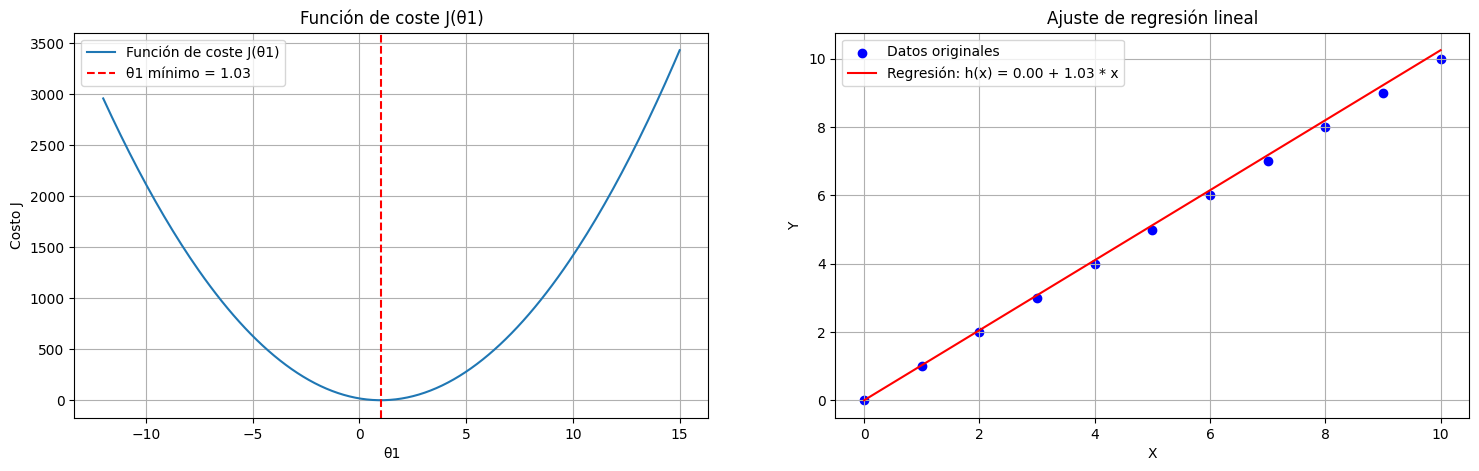

In [125]:
def H(theta_0, theta_1, X):
    return theta_0 + theta_1 * X

theta_0 = 0
theta_1_values = np.linspace(-12, 15, 200)

cost_values = []

for theta_1 in theta_1_values:
    h = H(theta_0, theta_1, X)
    J = coste(h, Y, m)
    cost_values.append(J)

theta_1_min = theta_1_values[np.argmin(cost_values)]
J_min = np.min(cost_values)



fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(theta_1_values, cost_values, label="Función de coste J(θ1)")
axes[0].axvline(x=theta_1_min, color='r', linestyle='--', label=f"θ1 mínimo = {theta_1_min:.2f}")
axes[0].set_title("Función de coste J(θ1)")
axes[0].set_xlabel("θ1")
axes[0].set_ylabel("Costo J")
axes[0].legend()
axes[0].grid(True)

h_min = H(theta_0, theta_1_min, X)

axes[1].scatter(X, Y, color='blue', label="Datos originales")
axes[1].plot(X, h_min, color='red', label=f"Regresión: h(x) = {theta_0:.2f} + {theta_1_min:.2f} * x")
axes[1].set_title("Ajuste de regresión lineal")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].legend()
axes[1].grid(True)

print(f"El valor mínimo de θ1 que minimiza la función de coste es: {theta_1_min:.2f}")

4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

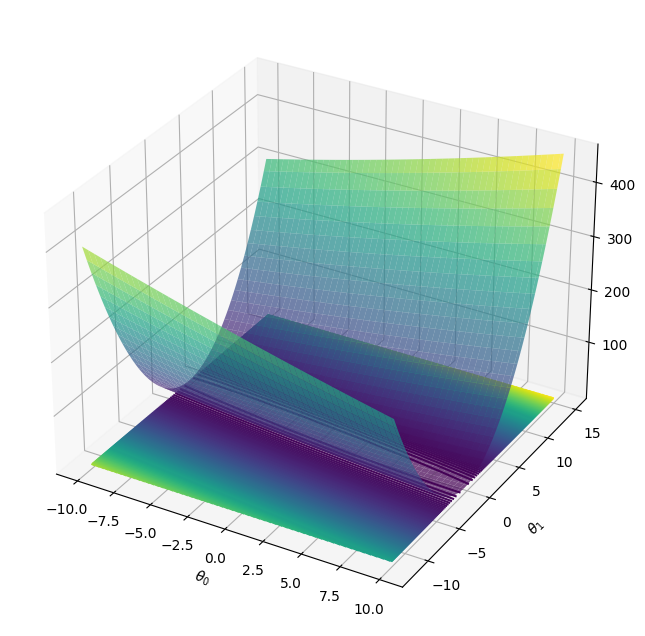

In [126]:
def coste(theta_0, theta_1, X, Y, m):
    h = H(theta_0, theta_1, X)
    return (1 / (2 * m)) * np.sum((h - Y) ** 2)


t0, t1 = np.meshgrid(theta_0_values, theta_1_values)

J = np.zeros_like(t0)
for i in range(t0.shape[0]):
    for j in range(t0.shape[1]):
        J[i, j] = coste(t0[i, j], t1[i, j], X, Y, m)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(t0, t1, J, cmap='viridis', edgecolor='none', alpha=0.7)

ax.contour(t0, t1, J, 200, linestyles="solid", offset=np.min(J), cmap='viridis')

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")

plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

Partimos que en el caso 1D la funcion de coste es de la forma:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}

Ahora bien, en el caso de una regresion lineal para dos variables independientes, debemos de expresar la funcion de coste como:

\begin{equation}
J(\theta_0, \theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m (h_θ (x^{(i)}_1,m x^{(i)}_2) - y^{(i)})^2
\end{equation}

Donde, al remplazar la funcion $ h_θ(x_1,x_2) = θ_0 + θ_1x_1 + θ_2 x_2$ obtenemos:

\begin{equation}
J(\theta_0, \theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( θ_0 + θ_1 x^{(i)}_1 + θ_2 x^{(i)}_2 - y^{(i)})^2
\end{equation}

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

Alpha: 0.001, Min x: 3.4001563538255475, Min f(x): 0.3598123998558618, Iterations: 1000
Alpha: 0.01, Min x: 3.949818057011984, Min f(x): 0.0025182274020524808, Iterations: 220
Alpha: 0.1, Min x: 3.983530057627939, Min f(x): 0.00027125900173901425, Iterations: 26


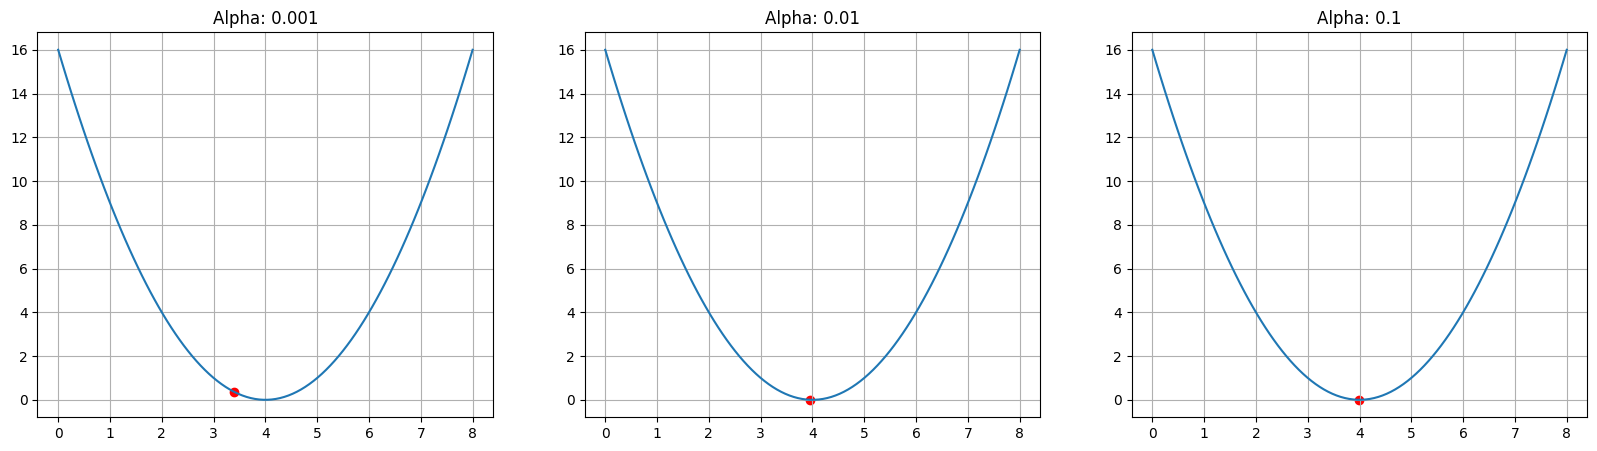

In [127]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 4)**2

def df(x):
    return 2*(x - 4)

def GradDesc(alpha, epsilon=1e-4 ,max_count=1000):
    x = np.random.randn()
    cont = 0

    while True:
        new_x = x - alpha * df(x)

        if abs(f(new_x) - f(x)) < epsilon or (cont == max_count):
            break

        x = new_x
        cont += 1

    return x, f(x), cont


alphas = [0.001, 0.01 , 0.1]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for alpha in alphas:
    min_x, min_f, iterations = GradDesc(alpha)
    print(f"Alpha: {alpha}, Min x: {min_x}, Min f(x): {min_f}, Iterations: {iterations}")

    x = np.linspace(0, 8, 100)
    y = f(x)

    axes[alphas.index(alpha)].plot(x, y)
    axes[alphas.index(alpha)].scatter(min_x, min_f, color='red')
    axes[alphas.index(alpha)].set_title(f"Alpha: {alpha}")
    axes[alphas.index(alpha)].grid(True)

7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

In [128]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def F(x, y):
  return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Grafico de la funcion F(x,y)', autosize=False, width=600, height=500, margin=dict(l=15, r=15, b=15, t=25))
fig.show()

Para poder emplear el gradiente descendiente debemos de hallar las derivadas parciales de $F(x,y)$, donde:

\begin{equation}
\frac{∂F}{∂x} = \cos \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) ⋅ (x \sin(2x + 1 - e^y)) - \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cdot 2\cos(2x + 1 - e^y)
\end{equation}


\begin{equation}
\frac{∂F}{∂y} = \cos \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) ⋅ \left(-\frac{1}{2}y\sin(2x + 1 - e^y)\right) + \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cdot e^y\sin(2x + 1 - e^y)
\end{equation}

In [129]:
def dF_dx(x, y):
  return np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * (x * np.sin(2 * x + 1 - np.exp(y))) - np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * 2 * np.cos(2 * x + 1 - np.exp(y))

def dF_dy(x, y):
  return np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * (-0.5 * y * np.sin(2 * x + 1 - np.exp(y))) + np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.exp(y) * np.sin(2 * x + 1 - np.exp(y))

def gradient_descent(x_start, y_start, learning_rate, num_iterations):
  x, y = x_start, y_start
  for i in range(num_iterations):
      grad_x = dF_dx(x, y)
      grad_y = dF_dy(x, y)
      x -= learning_rate * grad_x
      y -= learning_rate * grad_y
  return x, y


x_start = 2
y_start = 2
learning_rate = 0.01
num_iterations = 100


x_min, y_min = gradient_descent(x_start, y_start, learning_rate, num_iterations)


print(f"El mínimo se encuentra en: x = {x_min}, y = {y_min}")
print(f"Valor mínimo de la función: F(x_min, y_min) = {F(x_min, y_min)}")


El mínimo se encuentra en: x = 0.798975692489013, y = 1.760686828674613
Valor mínimo de la función: F(x_min, y_min) = -0.5608461680254015


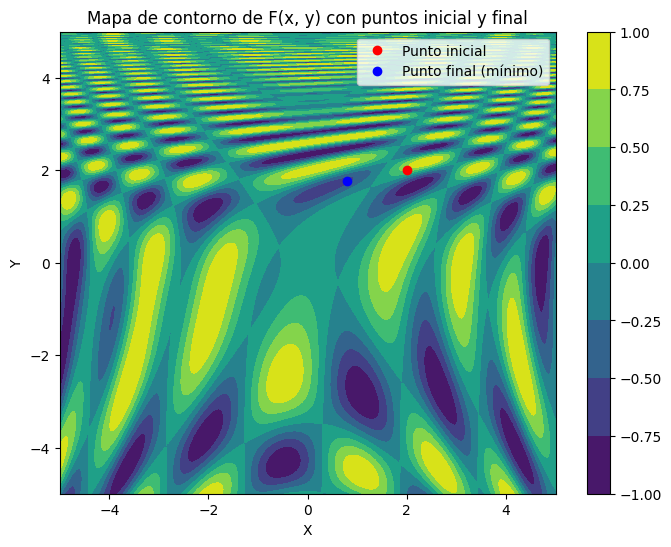

In [130]:
fig, ax2 = plt.subplots(figsize=(8, 6))
contour = ax2.contourf(X, Y, Z, cmap='viridis')
fig.colorbar(contour)

# Agregar los puntos iniciales y finales
ax2.plot(x_start, y_start, 'ro', label="Punto inicial")  # Punto inicial en rojo
ax2.plot(x_min, y_min, 'bo', label="Punto final (mínimo)")  # Punto final en azul

# Etiquetas y título
ax2.set_title('Mapa de contorno de F(x, y) con puntos inicial y final')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Agregar leyenda
ax2.legend()

plt.show()

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.


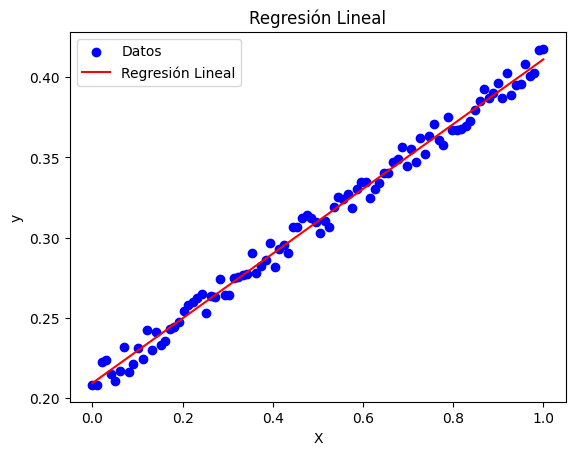

Parámetros Theta: [0.20940076 0.20168485]
Función de costo J(Theta): 1.6180035958107007e-05


In [131]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

X_matrix = np.vstack((np.ones(X.shape[0]), X)).T

Theta = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y)

h_theta = X_matrix @ Theta

m = len(y)
J_theta = (1 / (2 * m)) * np.sum((h_theta - y) ** 2)

plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, h_theta, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Parámetros Theta: {Theta}')
print(f'Función de costo J(Theta): {J_theta}')


9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

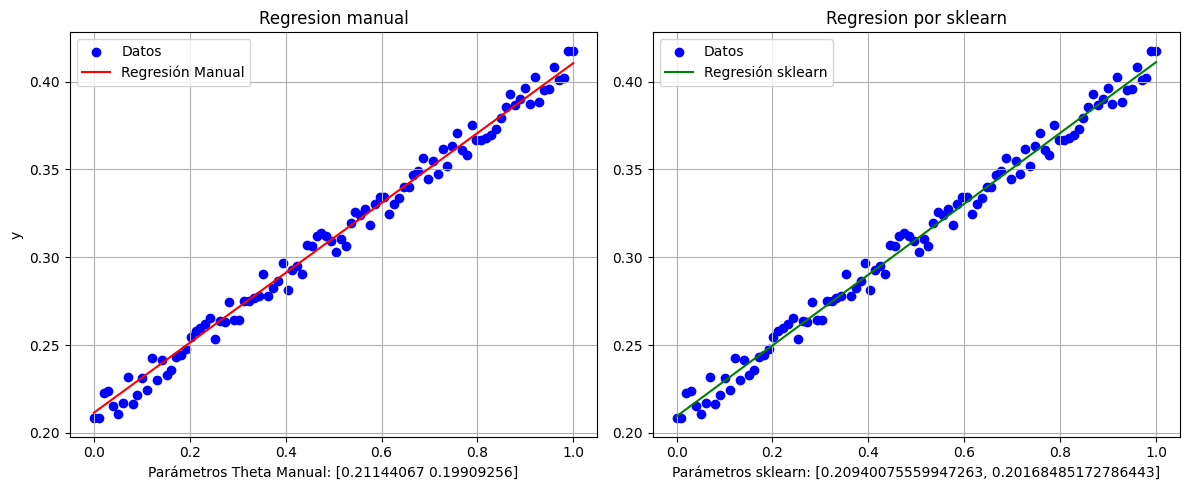

In [132]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, y)
h_theta_sklearn = model.predict(X_reshaped)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X, y, color='blue', label='Datos')
axs[0].plot(X, h_theta_manual, color='red', label='Regresión Manual')
axs[0].set_title('Regresion manual')
axs[0].set_xlabel(f'Parámetros Theta Manual: {Theta_manual}')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X, y, color='blue', label='Datos')
axs[1].plot(X, h_theta_sklearn, color='green', label='Regresión sklearn')
axs[1].set_title('Regresion por sklearn')
axs[1].set_xlabel(f'Parámetros sklearn: [{model.intercept_}, {model.coef_[0]}]')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.